In [19]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du
FIGURES_PATH = du.get_figures_path("rats", "cohort1")

# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [20]:
# ANIMALS
ANIMAL_IDS = ["C214", "C215", "C220", "C221", "C222", "C223"]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [21]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

[2023-12-19 14:10:09,641][WARNING]: MySQL server has gone away. Reconnecting to the server.


fetched 21 sessions for C214 between 2023-11-28 and 2023-12-18
fetched 21 sessions for C215 between 2023-11-28 and 2023-12-18
fetched 21 sessions for C220 between 2023-11-28 and 2023-12-18
fetched 21 sessions for C221 between 2023-11-28 and 2023-12-18
fetched 21 sessions for C222 between 2023-11-28 and 2023-12-18
fetched 21 sessions for C223 between 2023-11-28 and 2023-12-18


In [22]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS + ["C222"], date_min=date_min, date_max=date_max
# )
f_name = "C2s_days_df.csv"

# days_df.to_csv(du.DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS,
    save_dir=du.DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(du.DATA_PATH / f_name)

partial dj load with new date min 2023-11-28 -> 2023-12-18
Returning appended df with entries between 2023-11-28 and 2023-12-18
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/C2s_days_df.csv


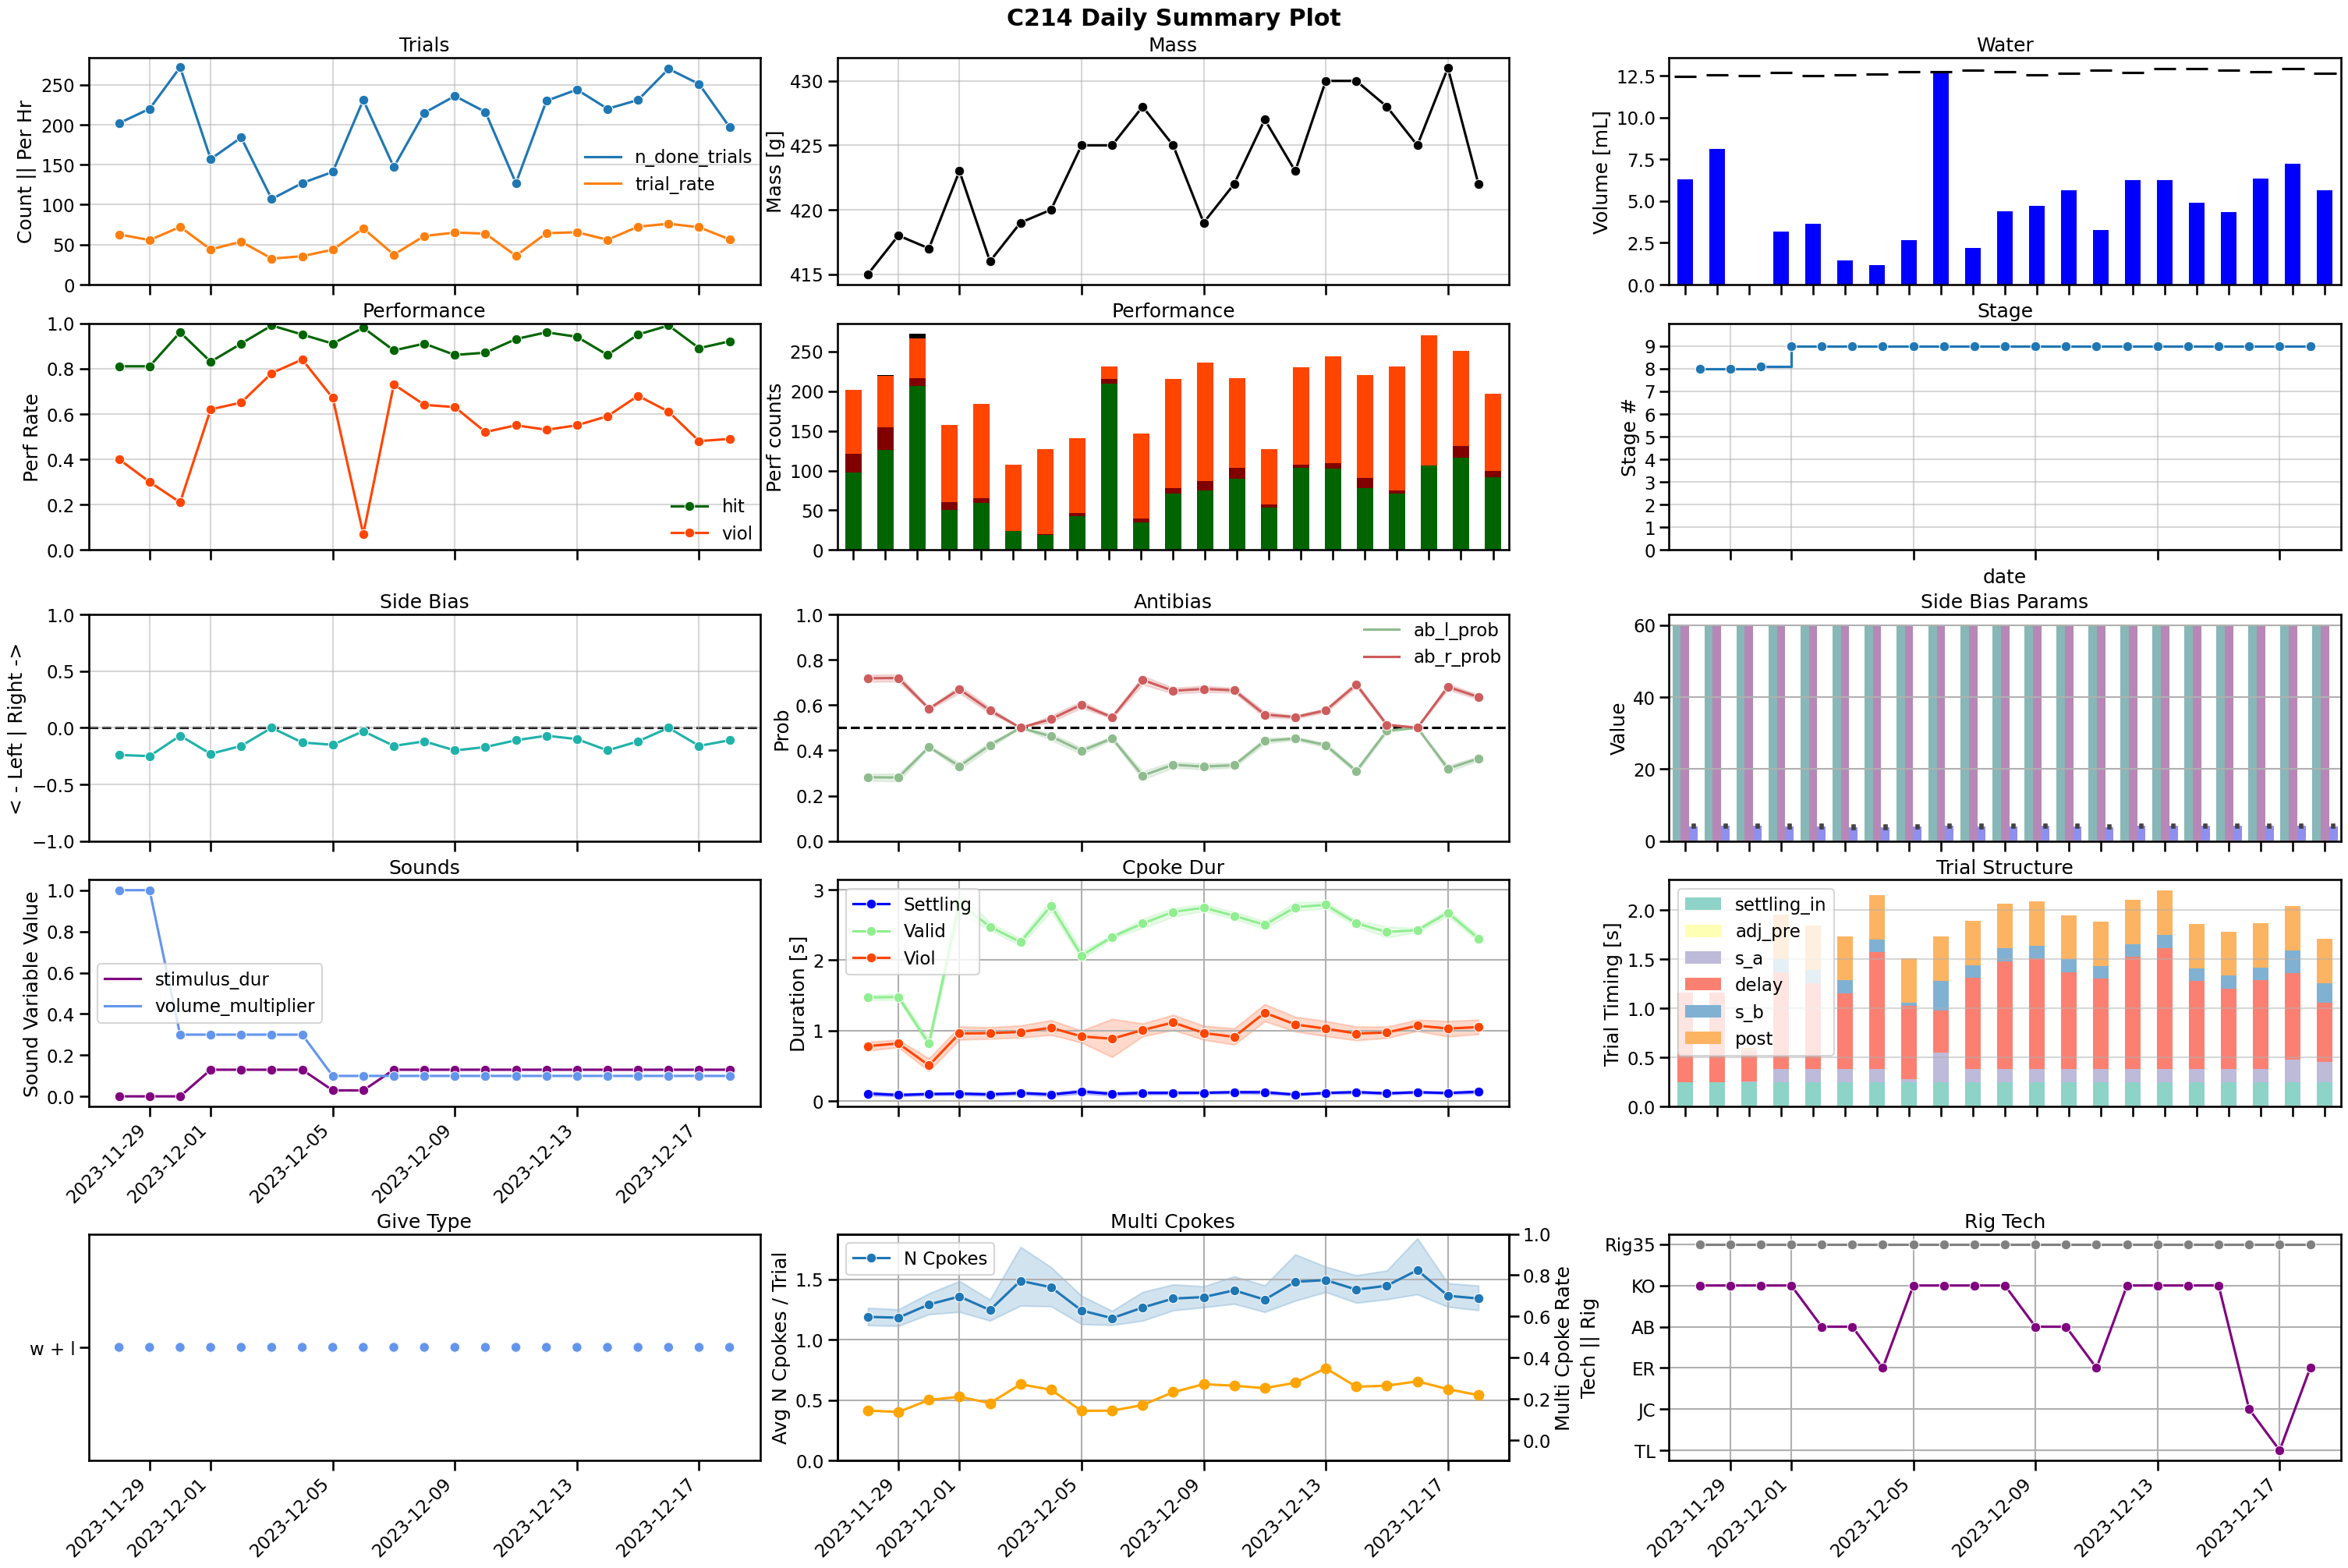

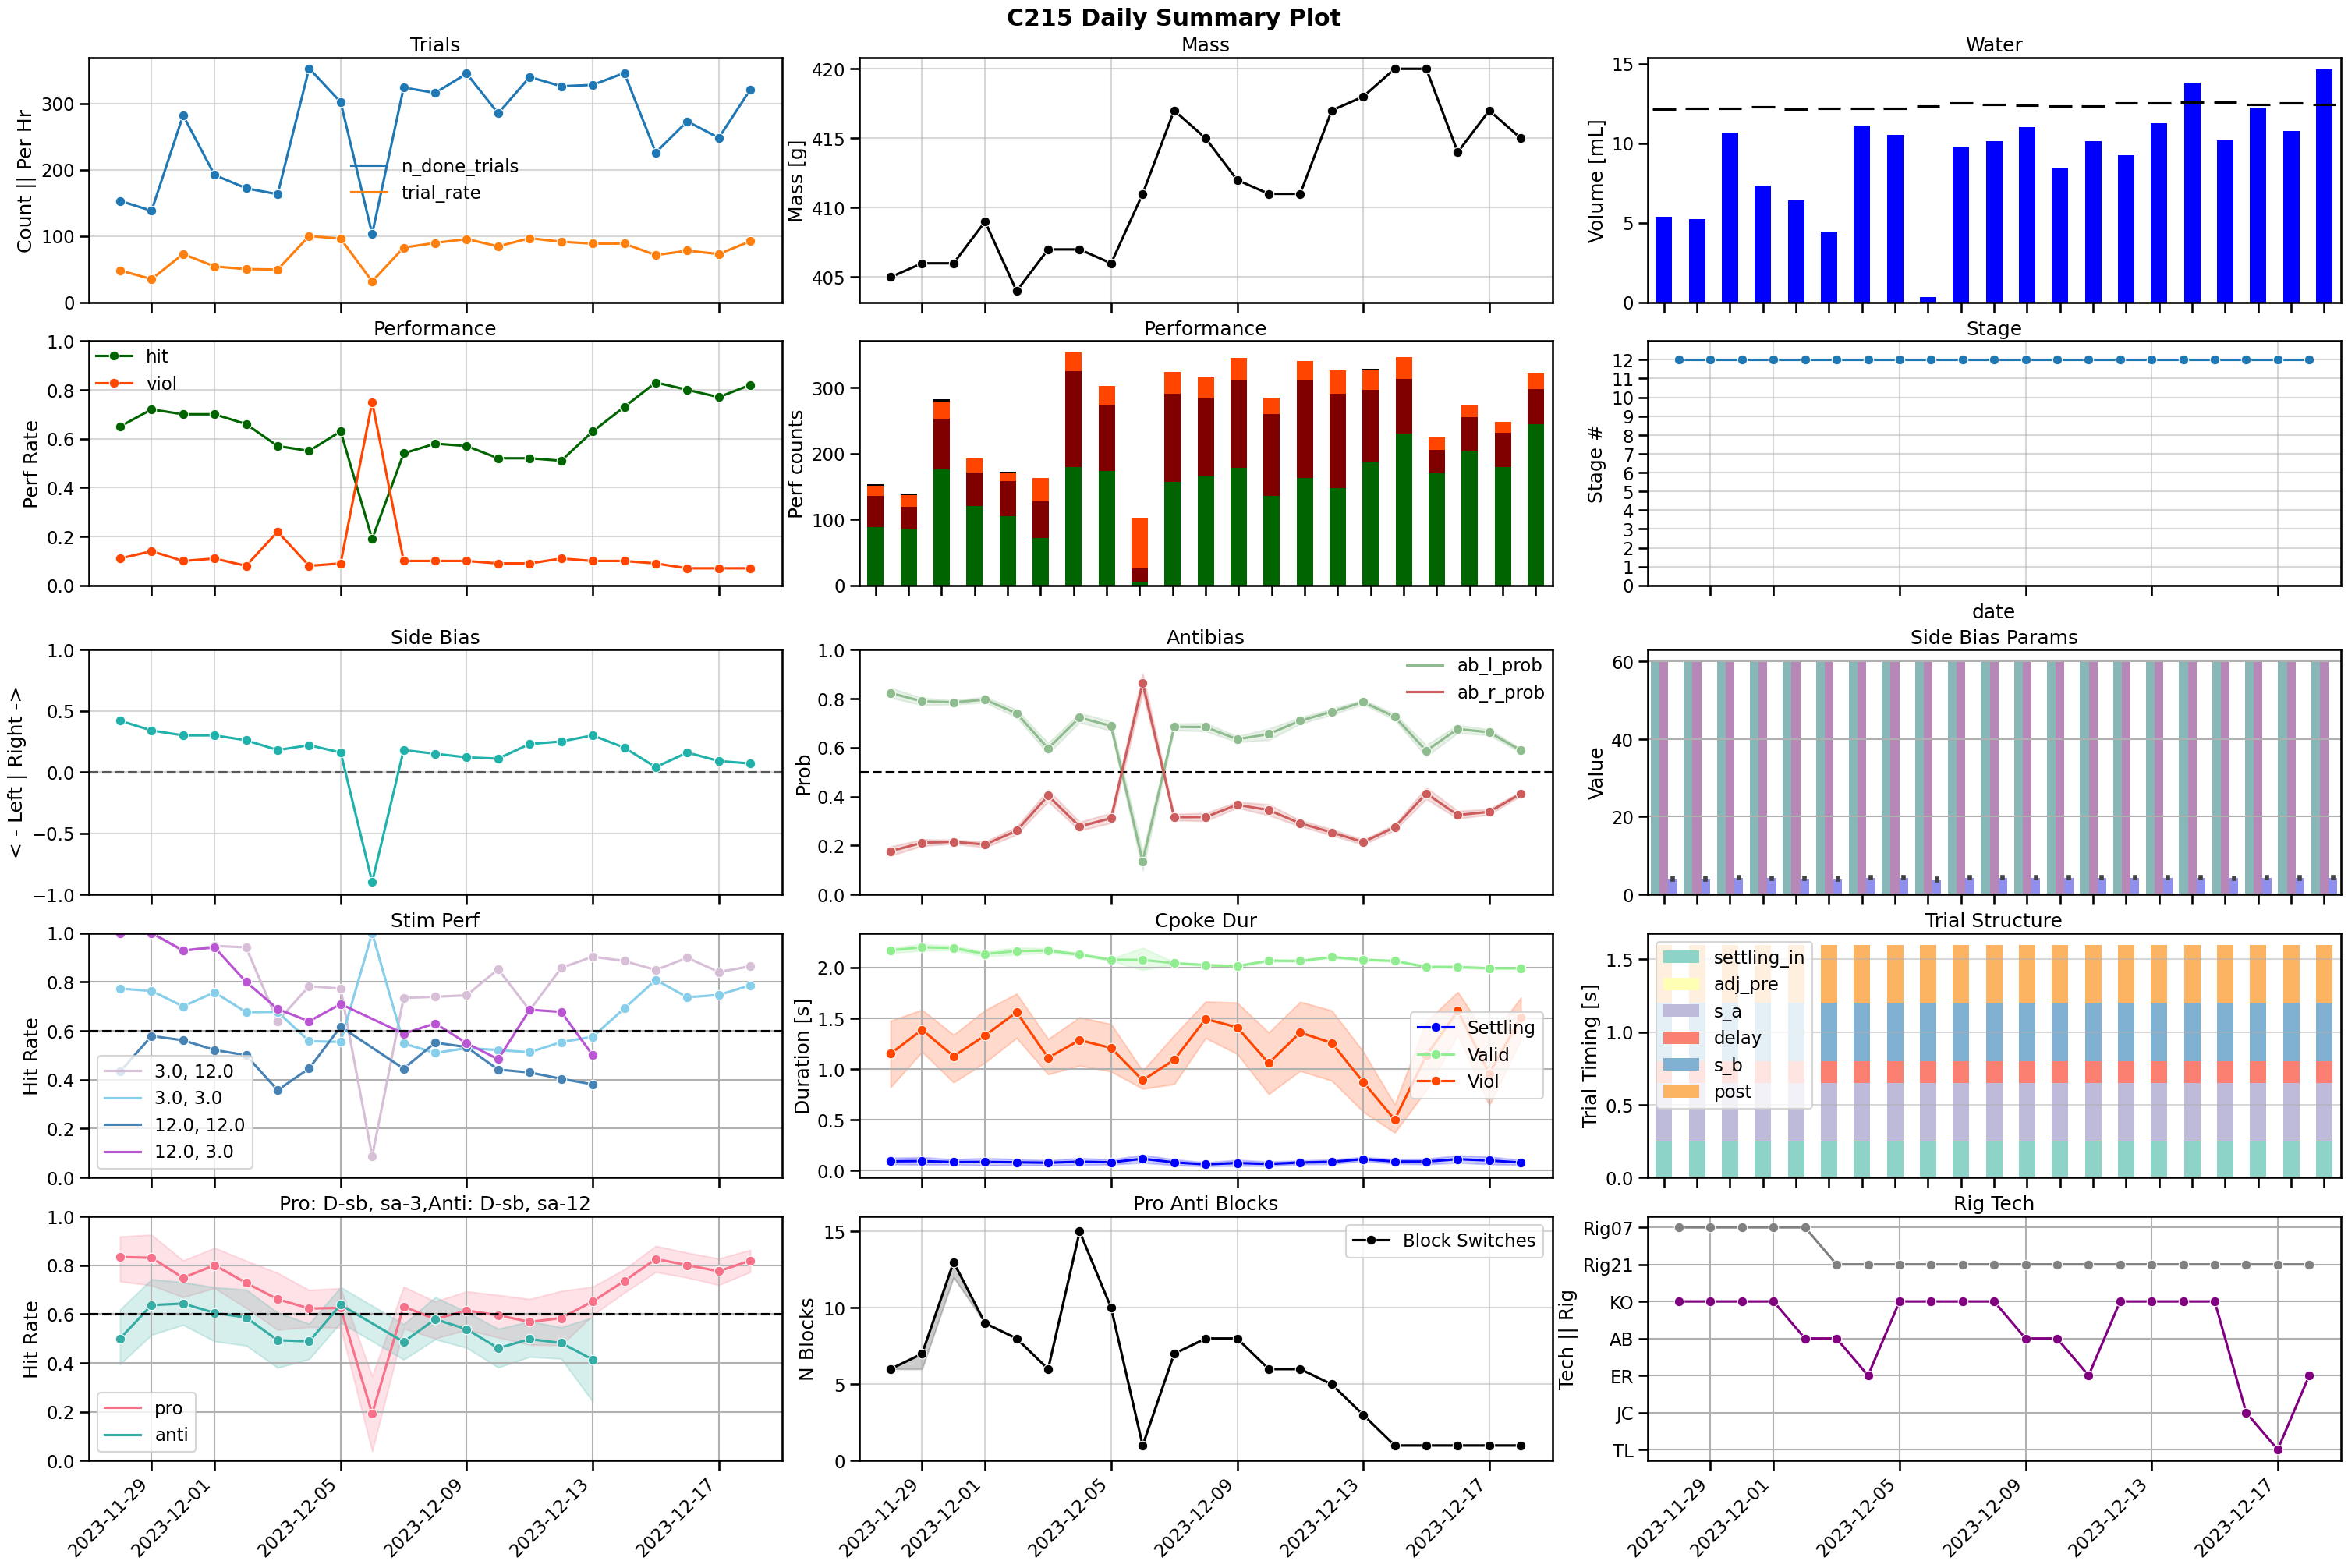

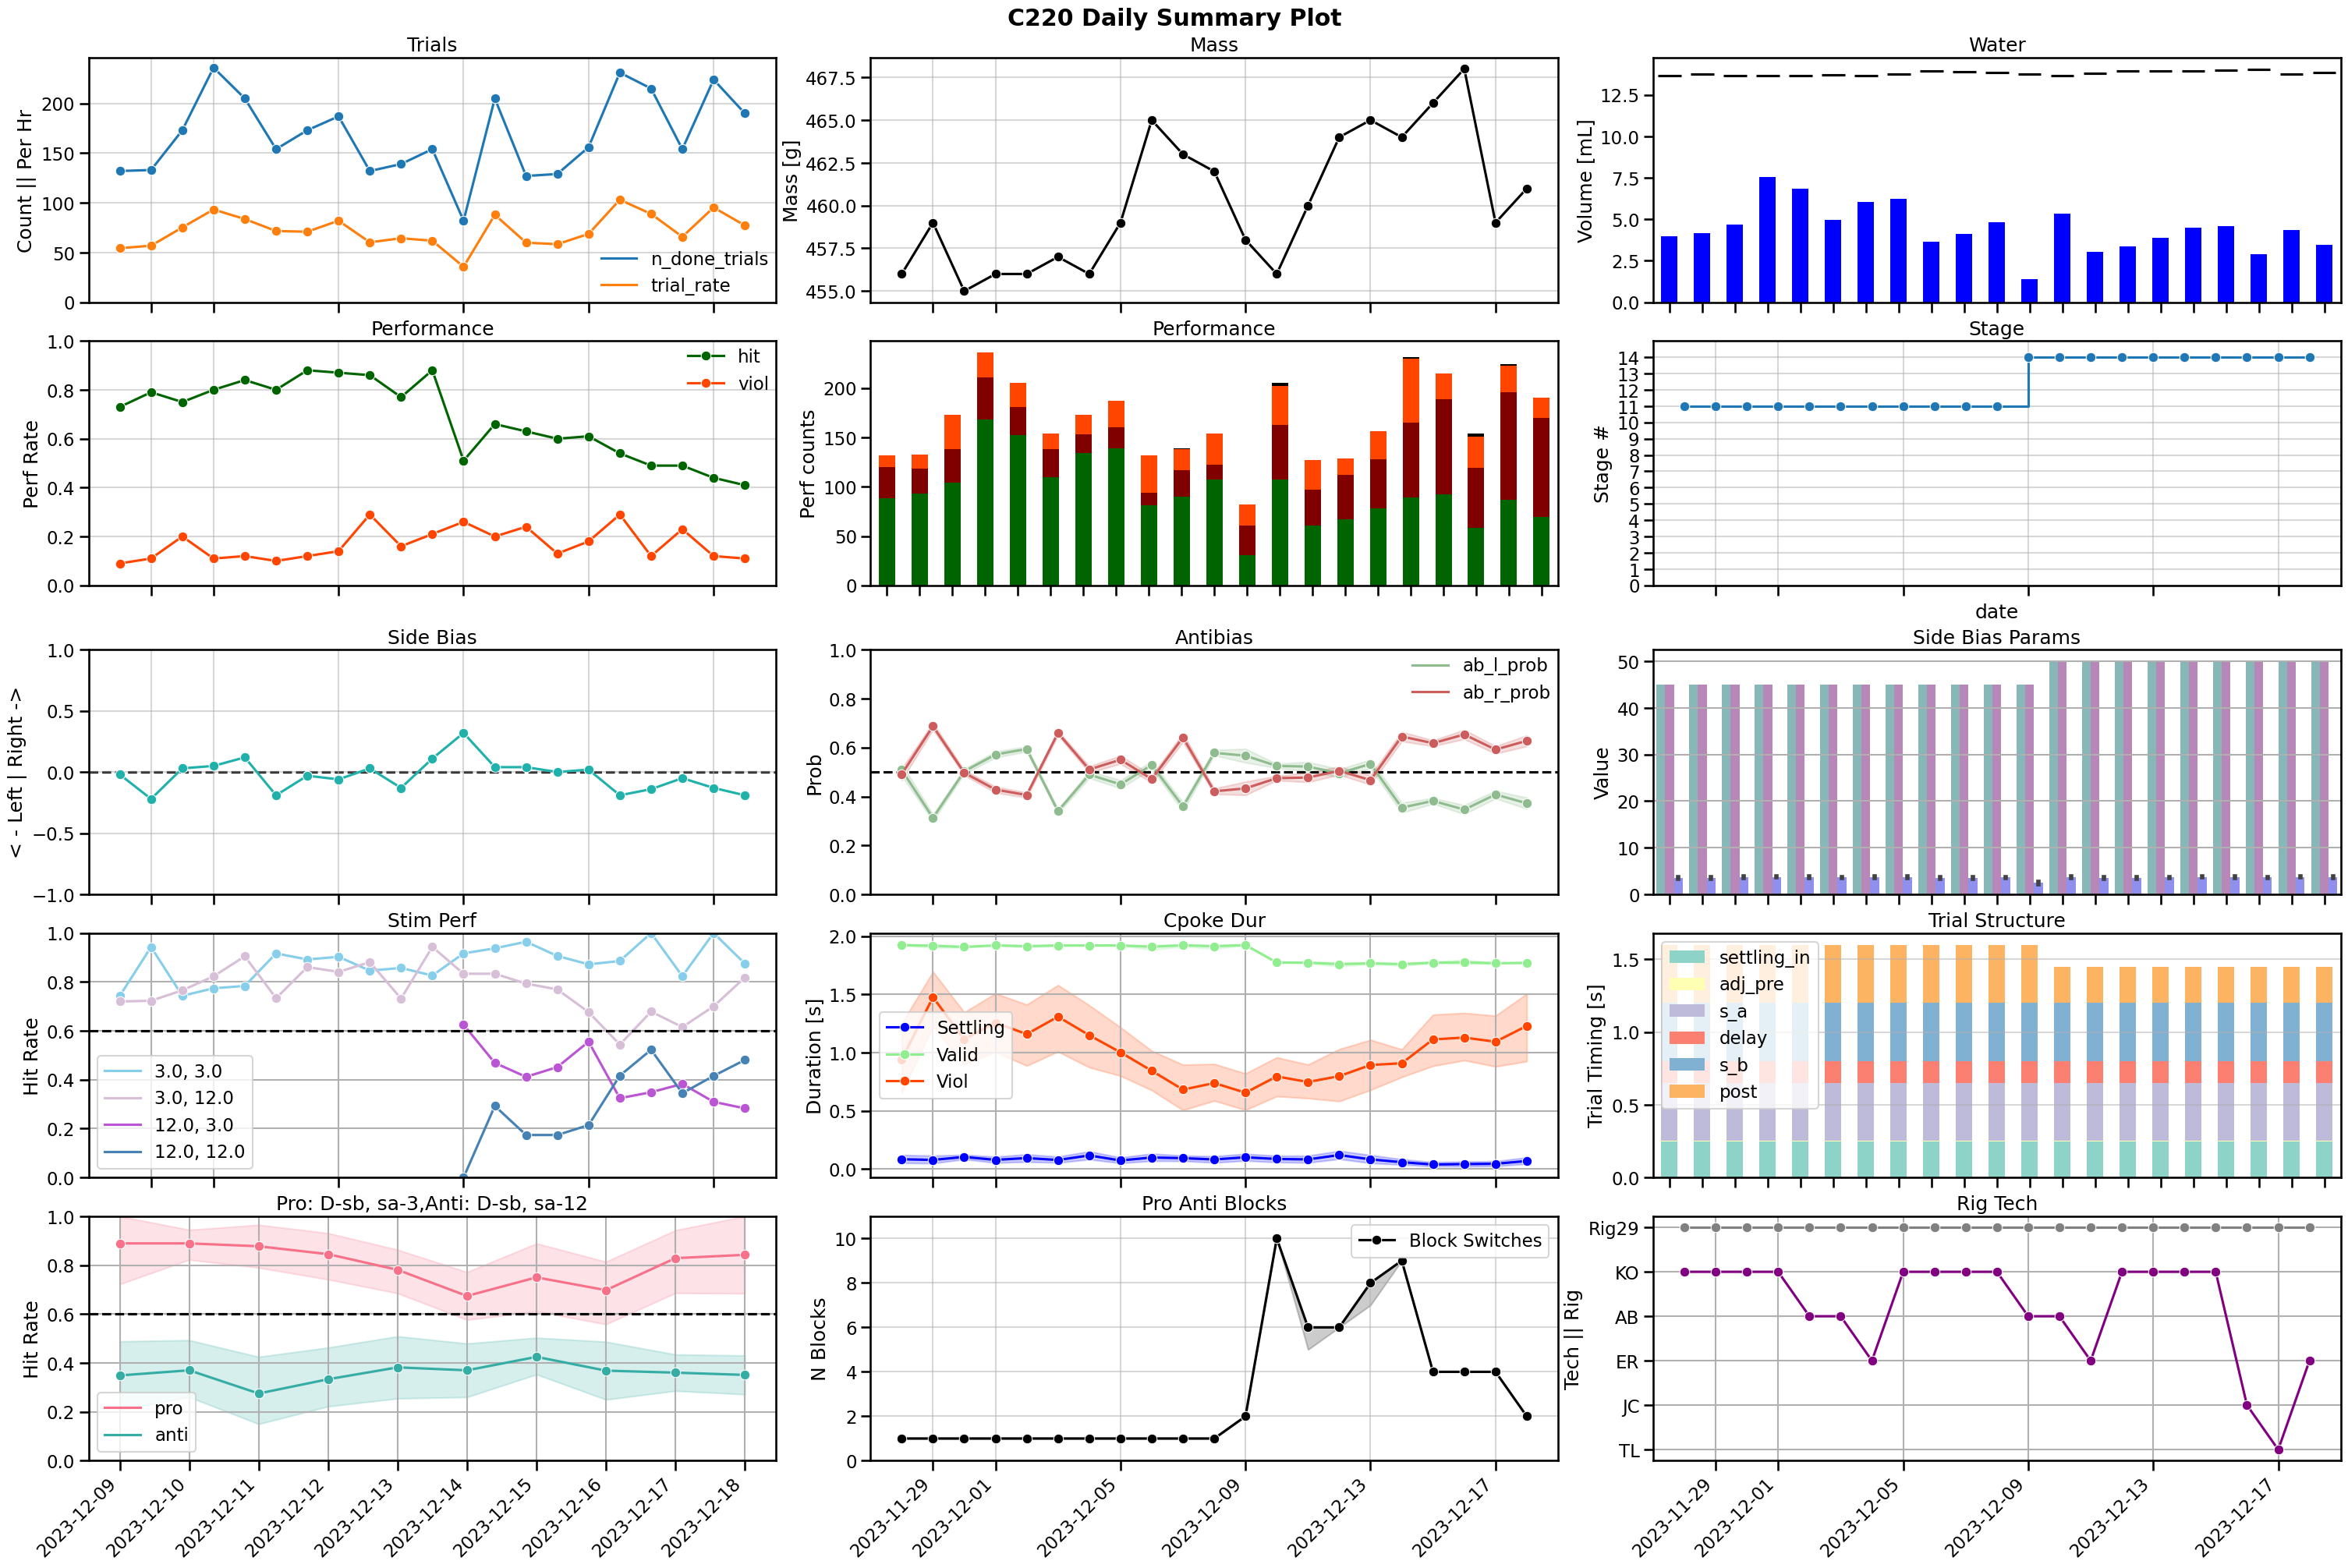

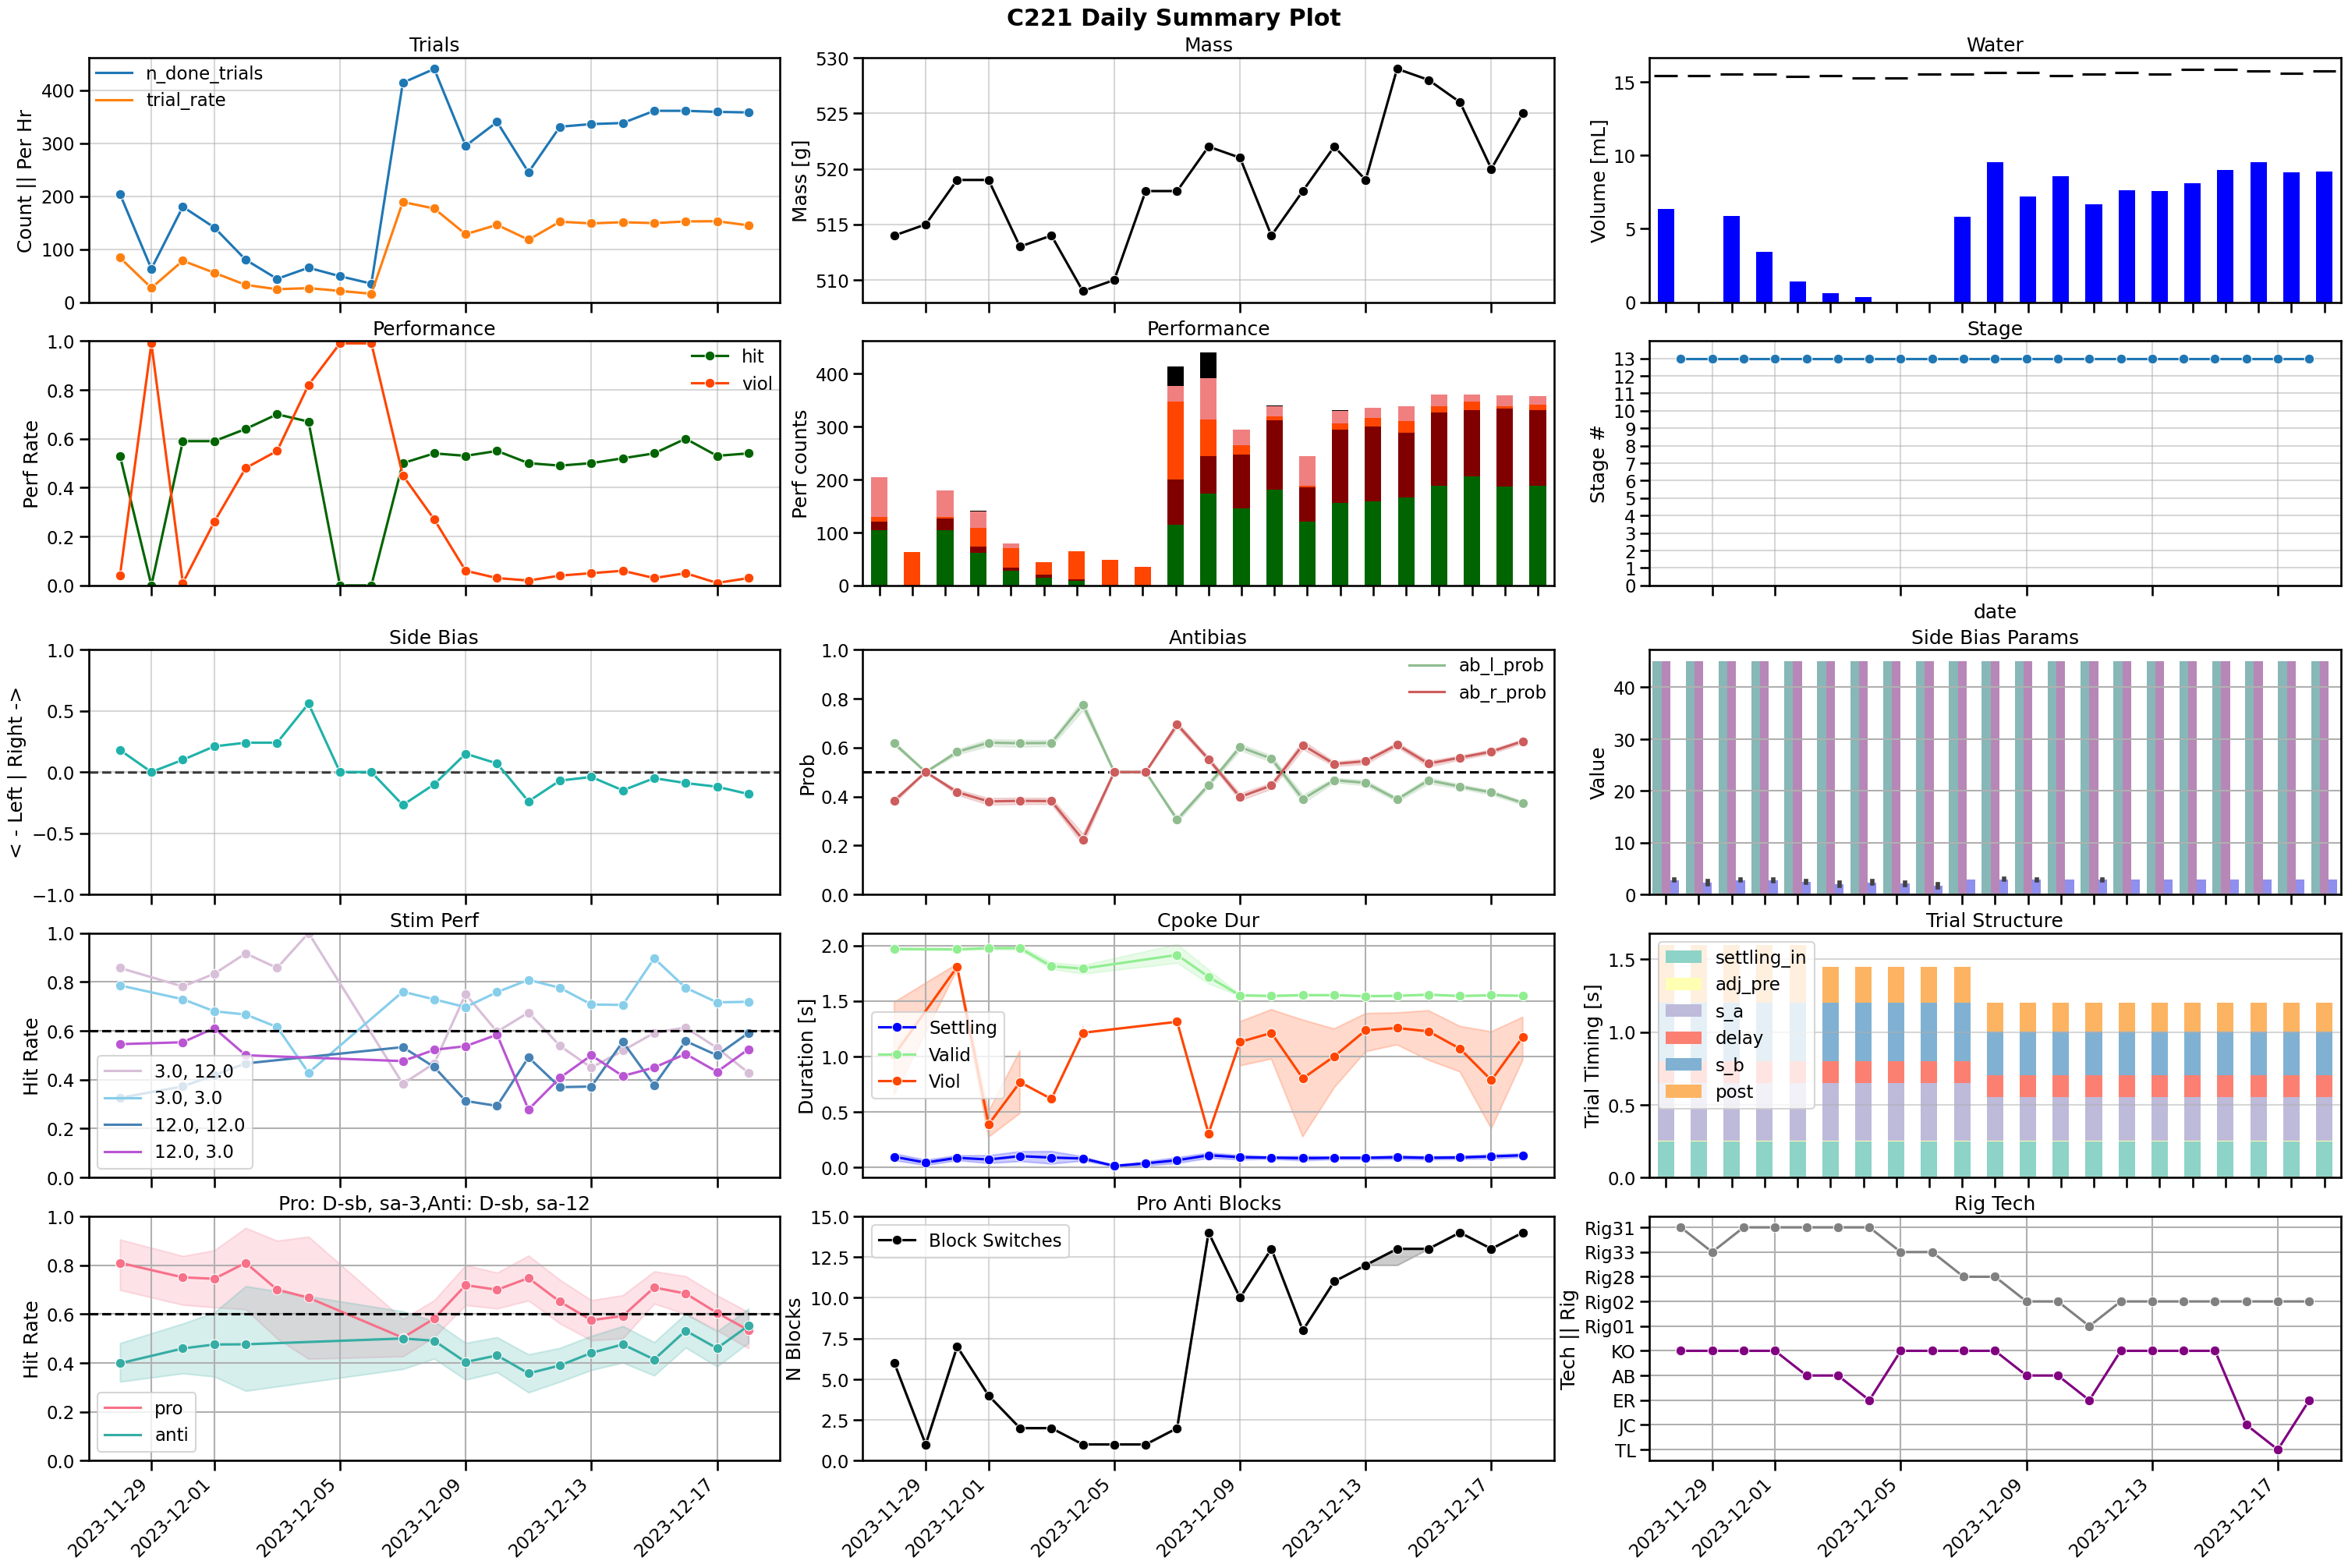

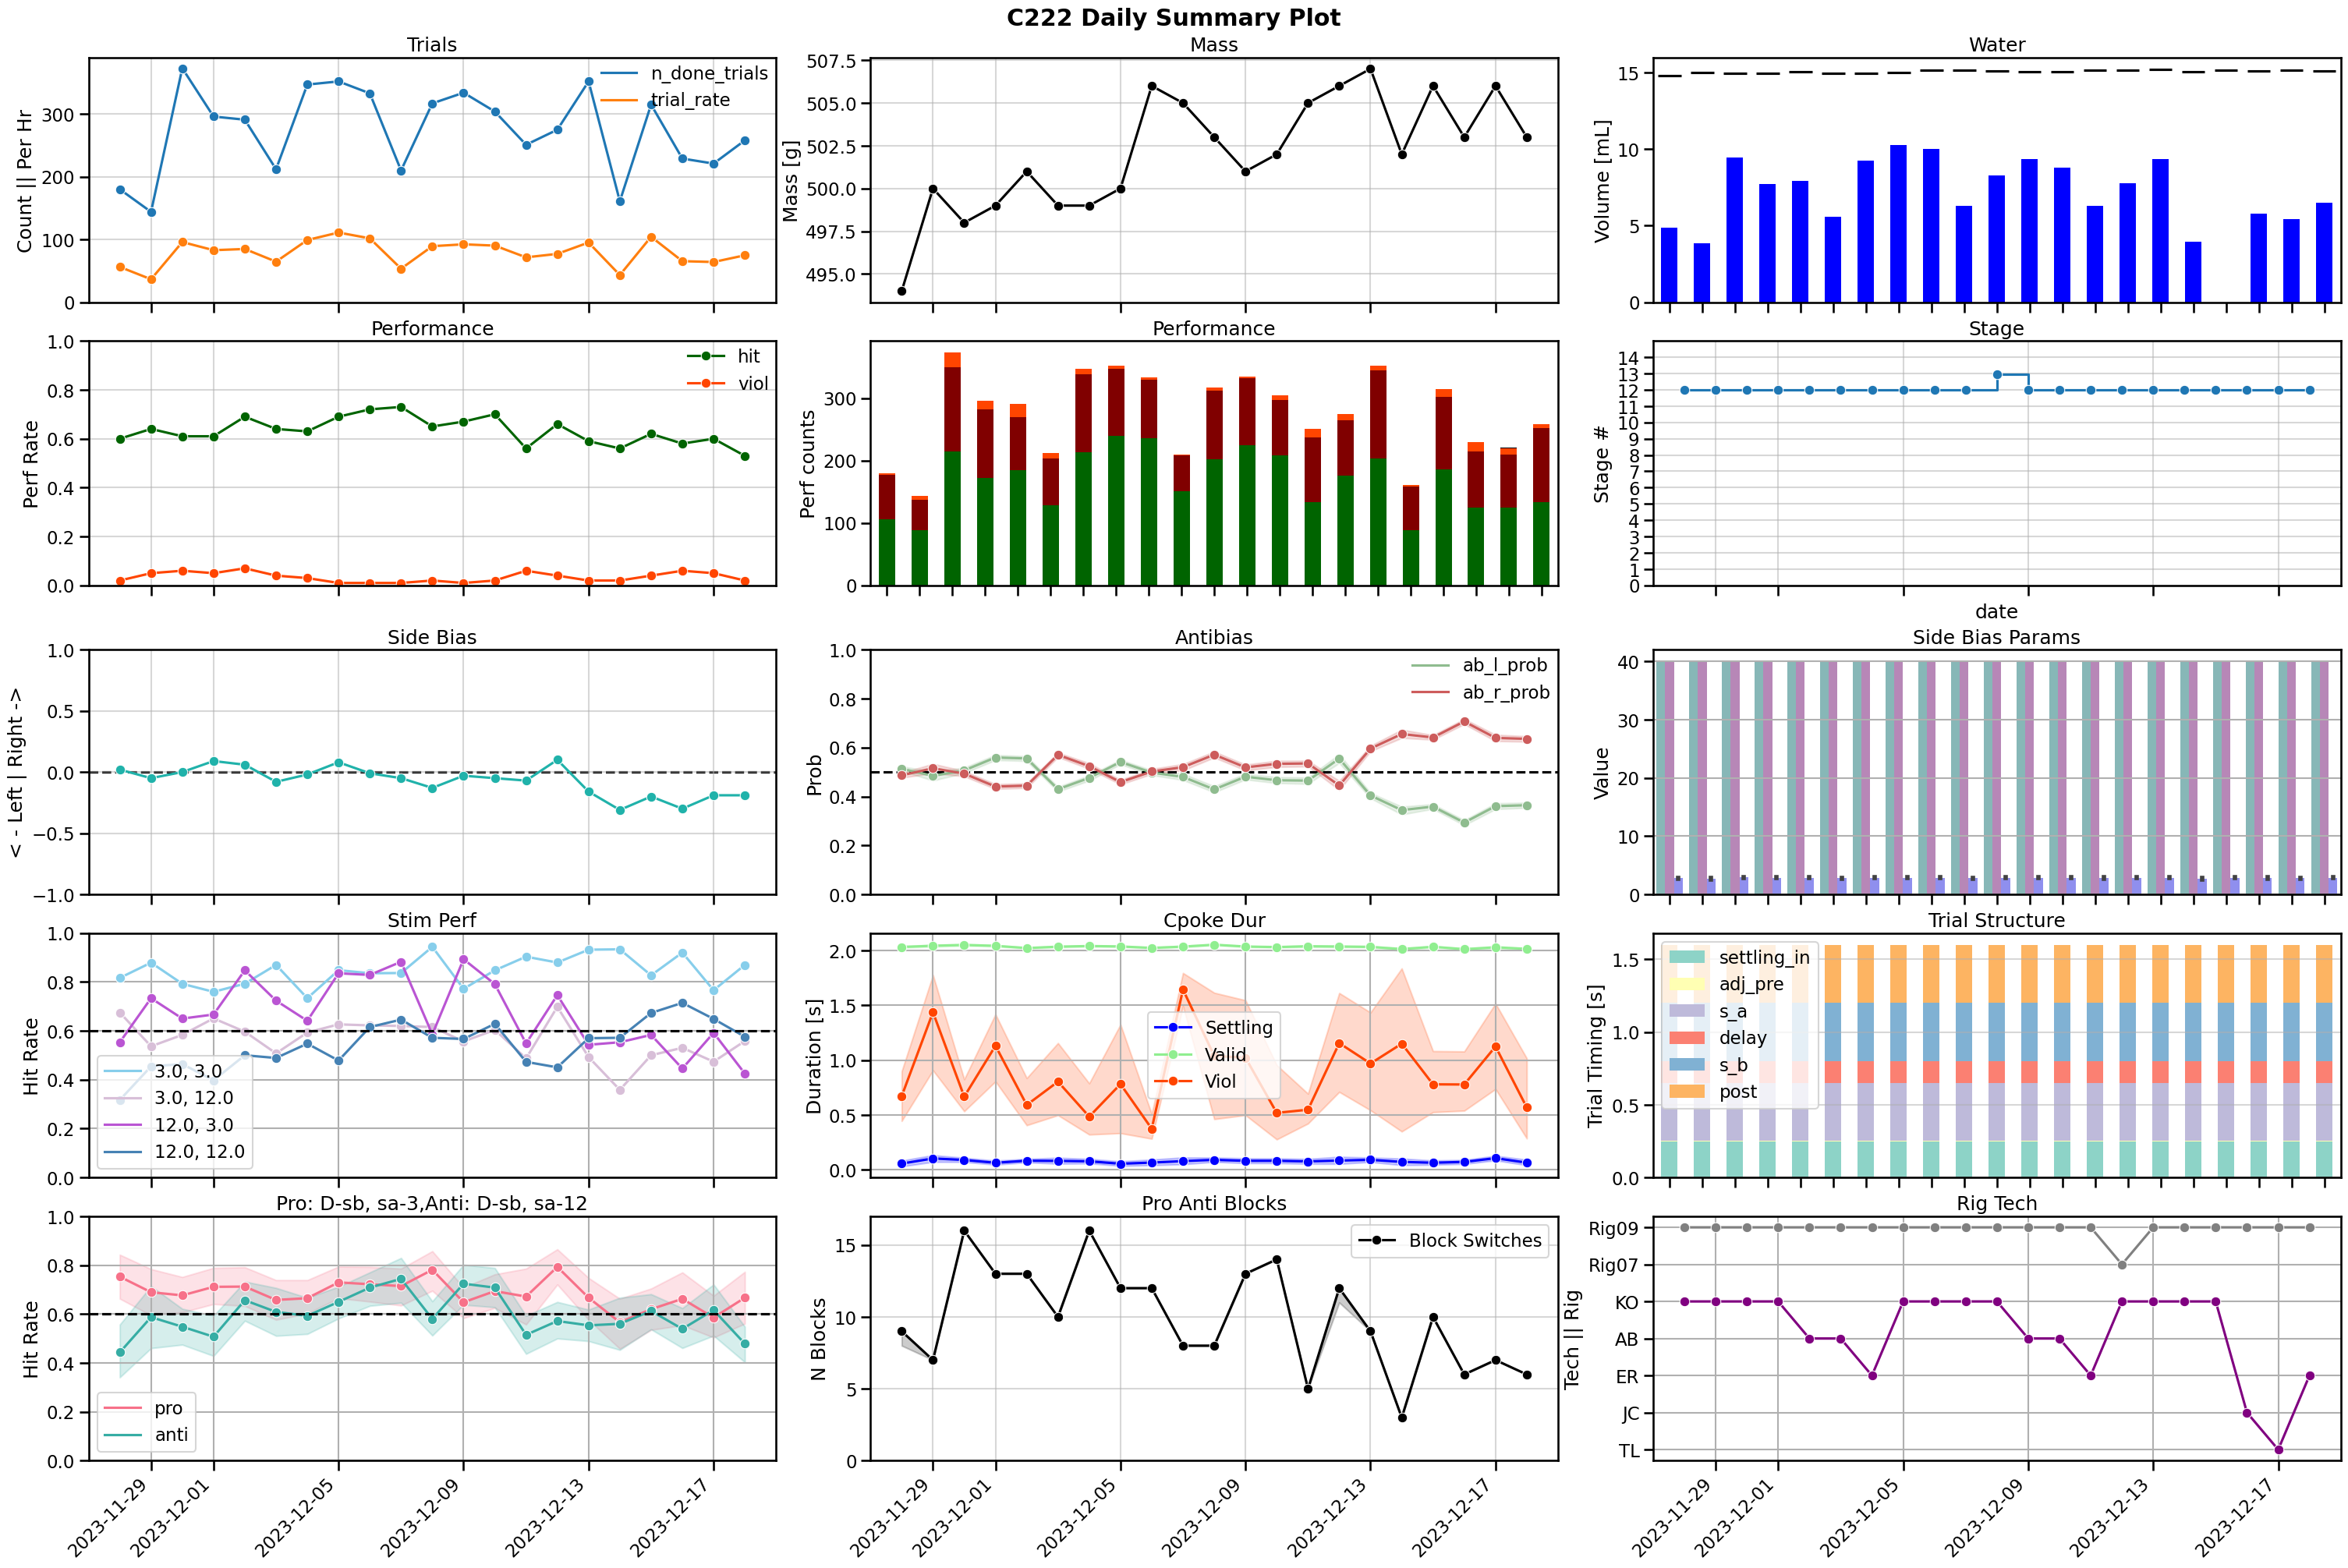

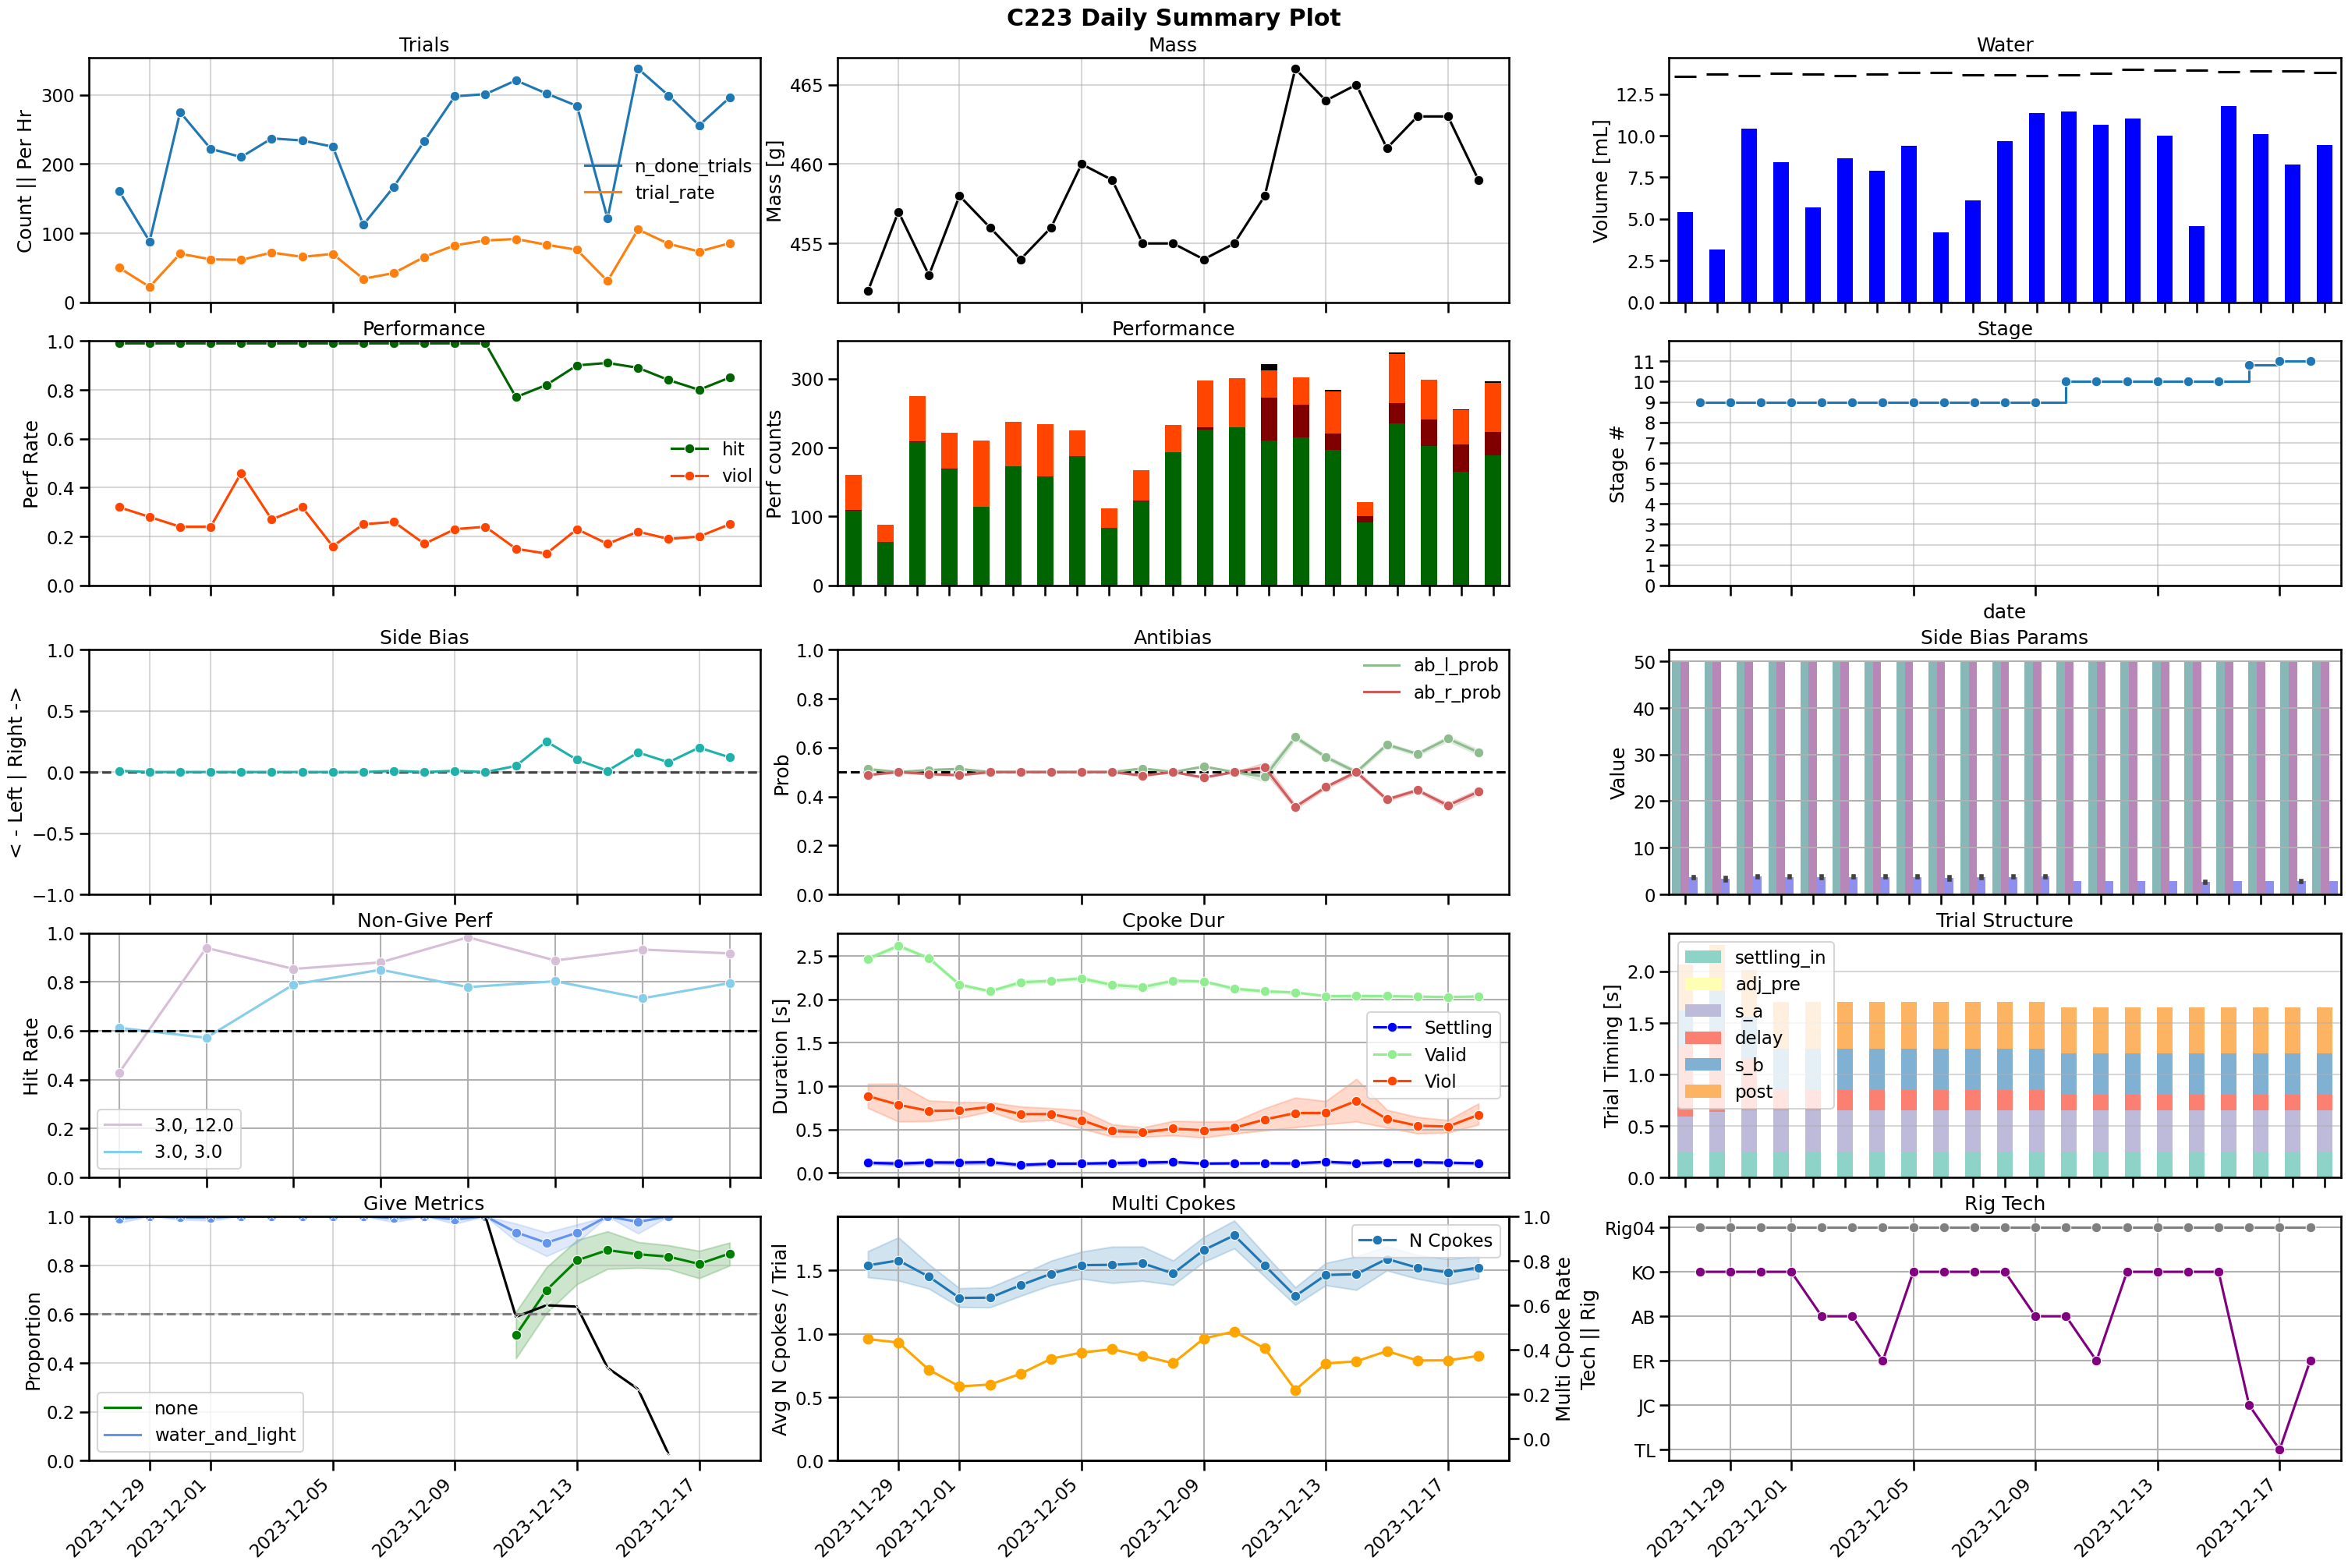

In [23]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [24]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C214_2023-11-30_day_summary
making C214_2023-12-18_day_summary
['s_a', 'delay', 's_b', 'post', 'go']
making C215_2023-12-18_day_summary
['s_a', 's_b', 'post', 'go']
making C220_2023-12-18_day_summary
['s_a', 'go']
making C221_2023-12-18_day_summary
['s_a', 's_b', 'post', 'go']
making C222_2023-12-18_day_summary
['s_a', 'go']
making C223_2023-12-18_day_summary
['adj_pre', 's_a', 'delay', 's_b', 'post', 'go']
